In [2]:
# 28 November 2020 v1.2
# Luc Berthouze
from random import expovariate, seed # Generate variates from exponential distribution
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt
def gillespie_ABA(N,B0,beta,gamma,Tmax):

    A=[N-B0] # We cannot predict how many elements there will be unfortunately
    B=[B0]
    T=[0] 
    state = np.random.permutation([0]*(N-B0)+[1]*B0) # Randomly allocate B0 individuals to have state B (state=1), A (state=0) otherwise 
    B_contacts = np.where(state==1)[0] # Index of individuals in state B (state=1).
    rate_vector = B0*beta*np.ones((N,1))/N # Set rates to be B0*beta/N (rate for individuals in state A) to all individuals (initialisation). 
    rate_vector[B_contacts] = gamma # Update rate of B_contacts to be gamma (the rate for individuals in state B)
    
    time = 0
    while time<=Tmax+0.5: # some (arbitrary) buffer after Tmax
        rate = np.sum(rate_vector) # Total rate (refer to Gillespie algorithm for details)
        cumrate = np.cumsum(rate_vector) # Cumulated sum of rates
        if rate > 0.000001: # if rate is sufficiently large
            random.seed(44)
            tstep = expovariate(rate) # Pick an exponentially distributed time. Beware of difference with exprnd in Matlab where it is 1/rate
            T.append(T[-1]+tstep) # Time of next event
            event = np.where(cumrate>np.random.rand()*rate)[0][0] # Find which individual will see its state change 
            if state[event]==0: # individual is in state A 
                A.append(A[-1]-1) # this state A individual becomes state B so number of state A individuals is decreased
                B.append(B[-1]+1) # obviously, number of state B individuals is increased 
                state[event] = 1 # Update state vector
                rate_vector[event] = gamma # Change rate of individual to B->A rate, namely gamma
                A_contacts = np.where(state==0)[0] # List of state A individuals after change
                rate_vector[A_contacts] += beta/N # Update rate of state A individuals to account for the extra state B individual
            else: # individual is in state B
                B.append(B[-1]-1) # this state B individual becomes state A so number of state B individuals is decreased
                A.append(A[-1]+1) # obviously, number of state A individuals is increased
                state[event] = 0 # Update state vector
                A_contacts = np.where(state==0)[0] # List of state A individuals after changes                                
                rate_vector[A_contacts] = beta*len(np.where(state==1)[0])/N # Update rate of state A individuals based on number of B individuals  
        else: # Nothing will happen from now on so we can accelerate the process
            time = T[-1] # current time
            while time <= Tmax + 0.5:
                A.append(A[-1]) # Just keep things as they are
                B.append(B[-1])
                T.append(T[-1]+0.5) # arbitrarily add 0.5 to clock
                time = T[-1]
        # Update time and proceed with loop 
        time = T[-1]         

    return T,A,B    


# Question 1 Simulation Work

### Changing R0 Value

<Figure size 432x288 with 0 Axes>

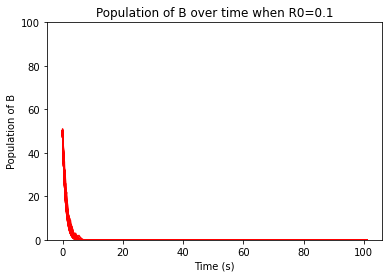

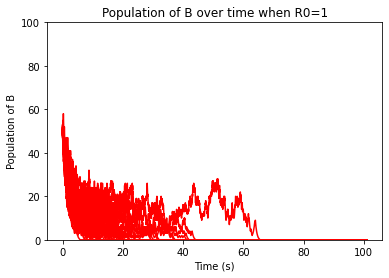

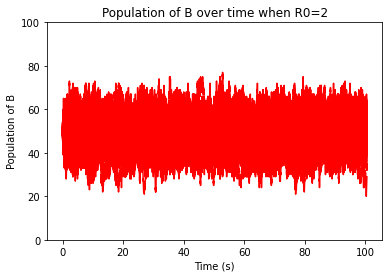

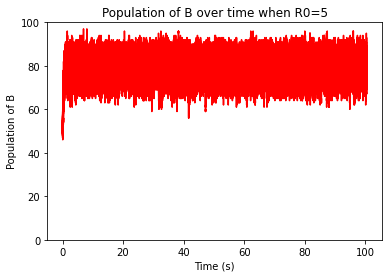

<Figure size 432x288 with 0 Axes>

In [35]:
#R0=0.1 (very small)
import pandas as pd
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(100,50,0.05,0.5, 100)
    dfs.append(df)
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time when R0=0.1')
plt.ylim(0,100)
plt.figure()

#R0=1
import pandas as pd
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(100,50,0.5,0.5, 100)
    dfs.append(df)
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time when R0=1')
plt.ylim(0,100)
plt.figure()
#small R0
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(100,50,1.0,0.5, 100)
    dfs.append(df)
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time when R0=2')
plt.ylim(0,100)
plt.figure()
#Large R0
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(100,50,2.5,0.5, 100)
    dfs.append(df)
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time when R0=5')
plt.ylim(0,100)
plt.figure()

Using the bifurcation plot from Q3 and the equation B*=((R0-1)*N)/R0, we can recognise that the population of B converges towards the fixed point over time, depending on the value of R0. These graphs help confirm and visualise the convergence of the population of B to its fixed point at different values of R0. I plotted 4 graphs with constant N,B0 and tmax values but different R0 values. When R0 is less than or equal to 1, the fixed point will converge towards population of B = 0.

When R0 is small and less than 1 (R0=0.1), the realisations of the gillespie algorithm converge towards population of B=0 over time, as seen by the first graph. The population size of B decreases dramatically over a short period of time. This is because B0=50 hence it has to decrease dramatically so the population of B can converge to 0. 

When R0=1, the realisation of the gillespie algorithm converges towards B=0 over time as seen by the second graph. This makes sense since the fixed point for R0=1 is where population of B is 0. The realisations seem to be more variable and they converge to B=0 after a longer time frame compared to when R0=0.1

When R0 is a large value (R0=5), the realisation of the stochastic processes converges to around B=80 over time as seen by the fourth graph. Hence the population of B increases to around 800 where it converges. Again this makes sense since the fixed point is at B=80 when you input R0=5 and N=1000 into the B* equation. In this scenario (fourth graph) state A turns into state B at a much higher rate than state B turns into state A. 



### Changing N value

The limit cases for N values will use small N value (N=10) and large N value (N=2000) at R0=0.1, R0=1 and R0=5 since they seem to be the informative R0 values. We will start with the small N values at different R0. 

<Figure size 432x288 with 0 Axes>

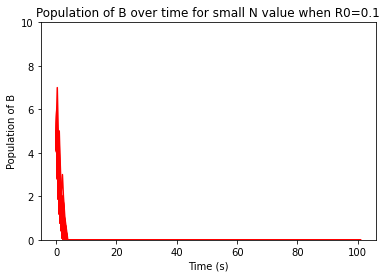

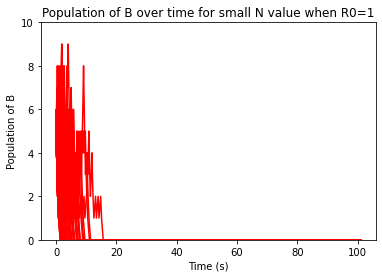

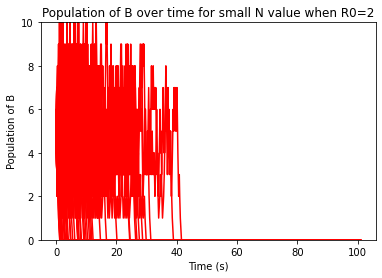

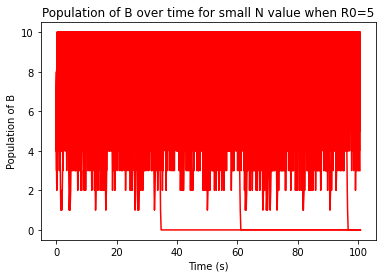

<Figure size 432x288 with 0 Axes>

In [36]:
#Very Small N value when R0=0.01
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(10,5,0.05,0.5, 100)
    dfs.append(df)
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for small N value when R0=0.1')
plt.ylim(0,10)
plt.figure()
#Small N value when R0=1
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(10,5,0.5,0.5,100)
    dfs.append(df)
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for small N value when R0=1')
plt.ylim(0,10)
plt.figure()
#Small N value when R0=2
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(10,5,1.0,0.5, 100)
    dfs.append(df)
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for small N value when R0=2')
plt.ylim(0,10)
plt.figure()
#Small N value when R0=5
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(10,5,2.5,0.5, 100)
    dfs.append(df)
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for small N value when R0=5')
plt.figure()

Regradless of the other parameters, when R0=0.1, the realisations converge immediately to B=0 and there is no variability in the realisations over time. 

When N=10 and R0=1 with initial population of B at 5, some of stochastic realisations at small time t increases the population of B followed by a steep convergence to B=0. There is some initial variability with some of the realisations however all of the realisations converge to 0 after 20s.

When N=10 and R0=5, the realisations are variable around the the stable fixed point at B=8. As visualised by the graphs above, when there is a small N value, there is more variability in the realisations over time for higher R0 values.

<Figure size 432x288 with 0 Axes>

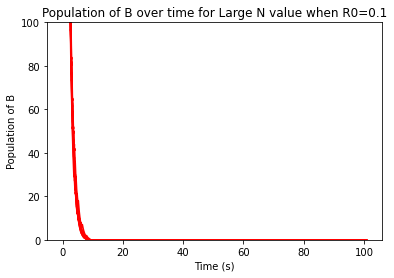

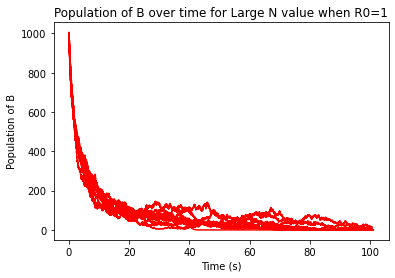

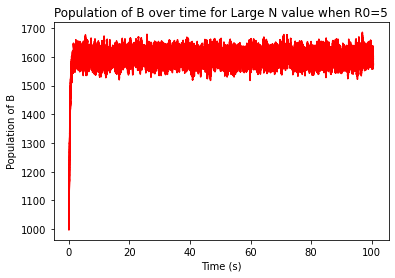

<Figure size 432x288 with 0 Axes>

In [4]:
#Large N value when R=0.01
import pandas as pd
from matplotlib import pyplot as plt
dfs = []
n = 10 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(2000,1000,0.05,0.5, 100)
    dfs.append(df)
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for Large N value when R0=0.1')
plt.ylim(0,100)
plt.figure()
#Large N value when R=1
dfs = []
n = 10 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(2000,1000,0.5,0.5, 100)
    dfs.append(df)
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for Large N value when R0=1')
plt.figure()
#Large N value when R=5.0
dfs = []
n = 10 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(2000,1000,2.5,0.5, 100)
    dfs.append(df)
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for Large N value when R0=5')
plt.figure()

For Large N value (N=1000) and R0=1, it takes large times t for the realisations to converge to B=0. When R0=5, the realisations immediately increase towards the stable fixed point at B=1600 and the realisations are variable around this point. Overall the value of N doesn't have a huge impact on the expected trends for a given R0 value.

### Changing B0 value

Again we will have small B0 values (B0=1 and N=100) and large B0 values (B0=90 and N=100) for different R0 values.

<Figure size 432x288 with 0 Axes>

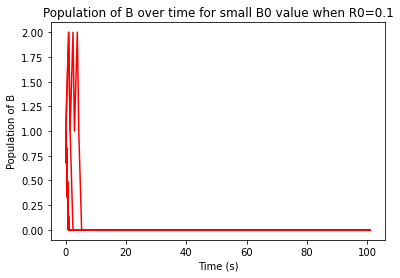

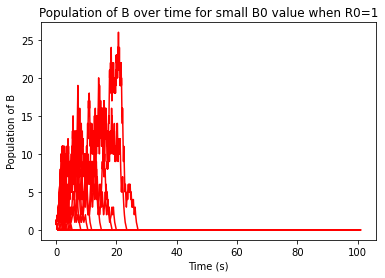

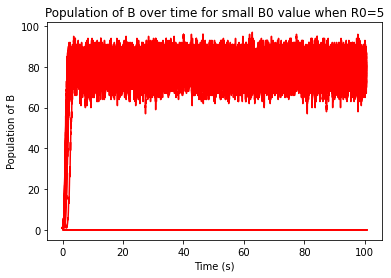

<Figure size 432x288 with 0 Axes>

In [39]:
#Small B0 value at R0=0.1
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(100,1,0.05,0.5, 100)
    dfs.append(df)
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for small B0 value when R0=0.1')
plt.figure()
#Small B0 value at R0=1.0
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(100,1,0.5,0.5, 100)
    dfs.append(df)
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for small B0 value when R0=1')
plt.figure()
#Small B0 value at R0=5.0
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(100,1,2.5,0.5, 100)
    dfs.append(df)
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for small B0 value when R0=5')
plt.figure()

At very small B0 value (B0=1) and R0=1, some of the realisations again are very variable at small time values with peaks at B=25 before all realisations converging to B=0 at t=30s.

At very small B0 value (B0=1) and R0=5, there are realisations that incorrectly converge to B=0 rather than the stable fixed point at B=80. This needs to be further investigated using average of the stochastic realisations.

<Figure size 432x288 with 0 Axes>

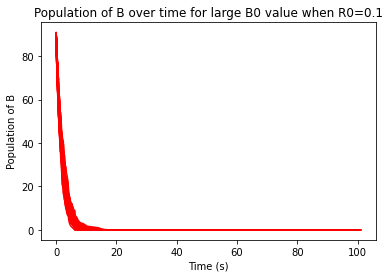

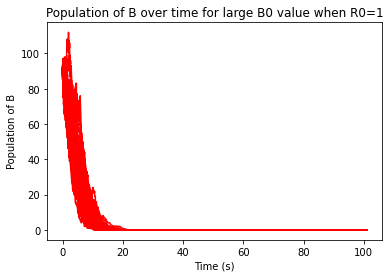

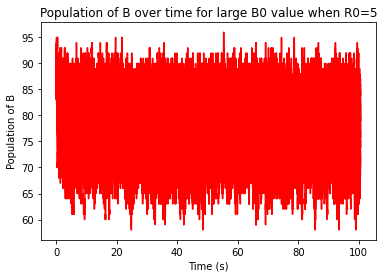

<Figure size 432x288 with 0 Axes>

In [28]:
#Large B0 value at R=0.1
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(100,90,0.05,0.5, 100)
    dfs.append(df)
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for large B0 value when R0=0.1')
plt.figure()
#Large B0 value at R=1.0
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(1000,90,0.5,0.5, 100)
    dfs.append(df)
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for large B0 value when R0=1')
plt.figure()
#Large B0 value at R=5.0
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(100,90,2.5,0.5, 100)
    dfs.append(df)
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for large B0 value when R0=5')
plt.figure()

At large B0 value (B=90 and N=100), there is a lot of variability when R0=1. In fact, after 100s some of the realisation have not converged to B=0. This provides further evidence of the larger variability and longer time for B to converge to 0, when R0=1. 

The key observations are that the R0 parameter is very critical in determining the convergence of the population over time. R0=1 is the critical value because any R0 value greater than 1 will mean the fixed point of convergence for population B is B* or greater than 0. Any R0 value below 1 means that the fixed point of convergence for the population of B is 0. This explains why it takes longer for realisations to converge to 0 and there is greater variation when R0=1. Other limit R0 values converge to their fixed point immediately whereas at R0=1 it takes much longer. This suggests that at R0=1, it is at the boundary of transition of the fixed point from 0 to B* or vice versa. Another observation is that the higher the R0, the greater the likelihood of states to change from A to B, for a constant B0 value. Changing N value didn't have much impact on the overall trend and when B0=1 some of the realisations converge to 0, even if the R0 value is high.

# Question 2

Calculating the average of the realisations is not possible when the time is exponentionally distributed, as seen in the Gillespie algorithm. We need a constant time value that is the same across all realisations for an average to be calculated. This can be done through resampling time series using panda. We will use a constant time sample for each stochastic realisation thus average can be calculated. We will use this technique for each scenario and superimpose the average with error bars. This time there will be 50 stochastic realisations to calculate a more accurate average. The average of stochastic realisations is expressed by the green line with error bars around it which represent the standard deviation.

### Changing R0 value

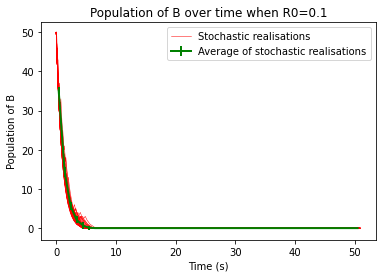

In [42]:
#Small R0 value
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta =0.05
gamma =0.5
N=100
B0=50
tmax=50
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt

plt.figure()

for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, color='green',zorder = 101, label='Average of stochastic realisations') #Average line has larger line width and different colour along with an error bar
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time when R0=0.1')
plt.legend()

No variability in the realisations at R0=0.1. The realisations immediately converge to B=0.

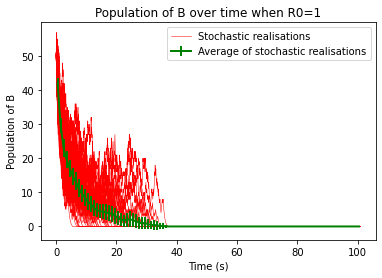

In [43]:
#R0=1.0
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta =0.5
gamma =0.5
N=100
B0=50
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt

plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, color='green',zorder = 101, label='Average of stochastic realisations') #Average line has larger line width and different colour along with an error bar
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time when R0=1')
plt.legend()

Variability of realisations until converge at B=0 when t=35s.

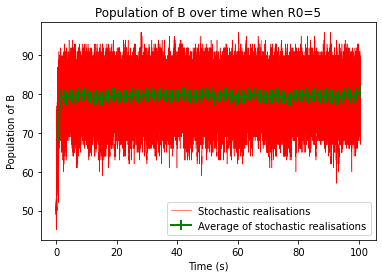

In [11]:
#Large R0 value
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta =2.5
gamma =0.5
N=100
B0=50
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt

plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, color='green',zorder = 101, label='Average of stochastic realisations') #Average line has larger line width and different colour along with an error bar
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time when R0=5')
plt.legend()

Average of stochastic realisations converges to its stable fixed point at B=80 at small times t. This average is maintained at the stable fixed point for large times, with some variability around the average.

### Changing N value

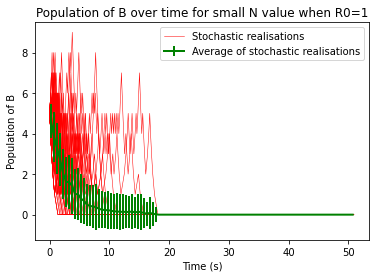

In [35]:
#Small N when R0=1
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta = 0.5
gamma =0.5
N=10
B0=5
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt

plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, zorder=101, color='green', label='Average of stochastic realisations') #Average line has larger line width and different colour along with an error bar
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for small N value when R0=1')
plt.legend()


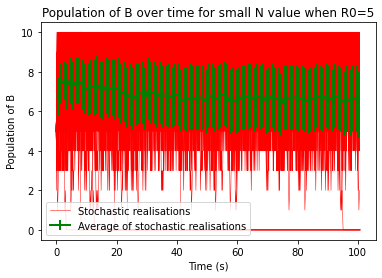

In [4]:
#Small N when R0=5
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta = 2.5
gamma =0.5
N=10
B0=5
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt

plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, color='green', zorder=101, label='Average of stochastic realisations') #Average line has larger line width and different colour along with an error bar
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for small N value when R0=5')
plt.legend()

When there is small N values, the realisations showcase greater deviation around the average for both R0=1 and 5, as demonstrated by a larger error bar compared to normal N values.

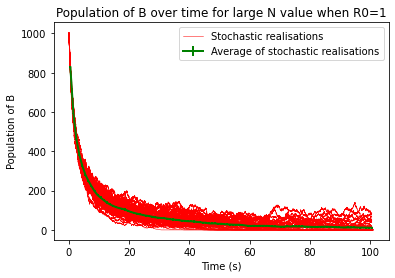

In [3]:
#Large N at R0=1
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta = 0.5
gamma =0.5
N=2000
B0=1000
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt

plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, color='green', zorder = 101, label='Average of stochastic realisations') #Average line has larger line width and different colour along with an error bar
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for large N value when R0=1')
plt.legend()

Large times for convergence at B=0 when N is large and R0=1

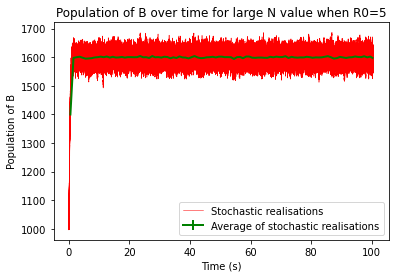

In [2]:
#Large N at R0=5
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta = 2.5
gamma =0.5
N=2000
B0=1000
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt

plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, color='green', label='Average of stochastic realisations') #Average line has larger line width and different colour along with an error bar
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for large N value when R0=5')
plt.legend()

### Changing B0 value

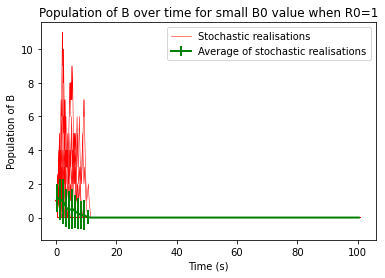

In [5]:
#Small B0 at R0=1
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta = 0.5
gamma =0.5
N=100
B0=1
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt

plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, zorder=101, color='green', label='Average of stochastic realisations') #Average line has larger line width and different colour along with an error bar
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for small B0 value when R0=1')
plt.legend()

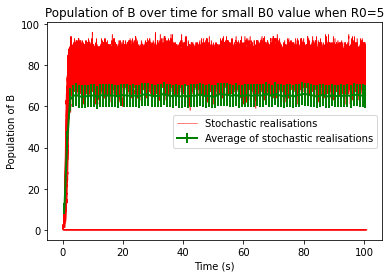

In [7]:
#Small B0 at R0=5
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta = 2.5
gamma =0.5
N=100
B0=1
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt

plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, zorder=101, color='green', label='Average of stochastic realisations') #Average line has larger line width and different colour along with an error bar
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for small B0 value when R0=5')
plt.legend()

Since some of the realisations converge at B=0 and other realisations converge at B=80, there is a large deviation around the average. Additionally, the average of stochastic realisations does not converge at the stable fixed point due to this variability. 

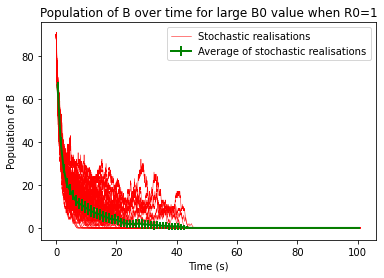

In [11]:
#Large B0 at R0=1
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta = 0.5
gamma =0.5
N=100
B0=90
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero--- question 4
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt

plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, zorder=101, color='green', label='Average of stochastic realisations') #Average line has larger line width and different colour along with an error bar
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for large B0 value when R0=1')
plt.legend()

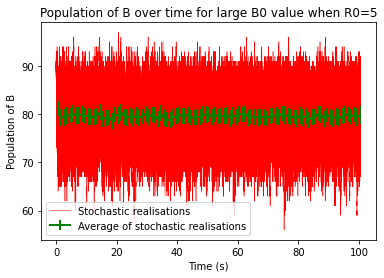

In [10]:
#Large B0 at R0=5
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta = 2.5
gamma =0.5
N=100
B0=90
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt

plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, zorder=101, color='green', label='Average of stochastic realisations') #Average line has larger line width and different colour along with an error bar
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for large B0 value when R0=5')
plt.legend()

Overall, the method of resampling to find the average of stochastic realisations is a useful technique for exponentially distributed times. It is helpful to know the average and standard deviation of the many stochastic realisations over time for different parameters, as visualised by the graphs above.

### Question 3

After superimposing the mean field solution from analytical work we can compare the agreement between the average of stochastic realisations and the mean field equation. I have plotted the results for R0 =1 and R0=5 as well as at B0=1. The results and interpretation of the results are below. When superimposing the mean field solution, we cannot make R0 equal to exactly 1 as the equation B_true cannot be divided by 0. Thus we use a R0 value very close to 1.

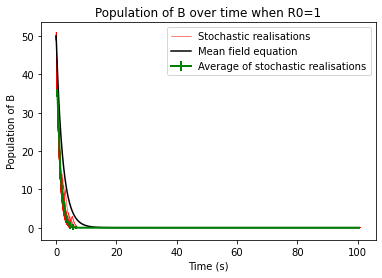

In [3]:
#R0=1 with the MFE line
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta =0.05
gamma =0.5
N=100
B0 =50
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt


plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, color='green',zorder=101, label='Average of stochastic realisations' )


#Mean field equation
C=(N*(beta-gamma)-B0*beta)/(B0*N*(beta-gamma))
B_true = (N*(beta-gamma))/(beta+(C*N*(beta-gamma)*np.exp((gamma-beta)*t)))
plt.plot(t,B_true,color = 'black', label= 'Mean field equation')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time when R0=1')
plt.legend()


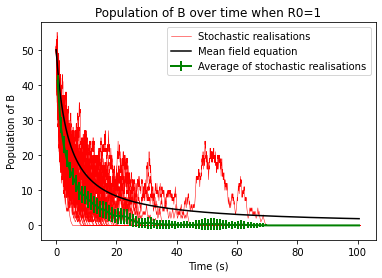

In [3]:
#R0=1 with the MFE line
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta =0.50001
gamma =0.5
N=100
B0 =50
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt


plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, color='green',zorder=101, label='Average of stochastic realisations' )


#Mean field equation
C=(N*(beta-gamma)-B0*beta)/(B0*N*(beta-gamma))
B_true = (N*(beta-gamma))/(beta+(C*N*(beta-gamma)*np.exp((gamma-beta)*t)))
plt.plot(t,B_true,color = 'black', label= 'Mean field equation')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time when R0=1')
plt.legend()


The average of stochastic realisations has a steeper decline in Population of B and converges to B=0 much sooner than the mean field when R0 equals around 1. The mean field solution can never converge to B=0 since R0=1 does not have a physical solution therefore we use R0=1.0002. This will converge when B is very close to 0 but not exactly 0. The average of stochastic realisations converges to B=0 at t=70s. These two solutions will never have the same convergence since mean field solution never converges to B=0.

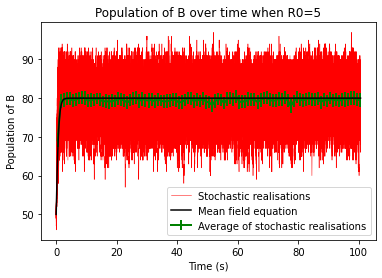

In [4]:
#R0=5 with the MFE line
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta =2.5
gamma =0.5
N=100
B0 =50
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt


plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, color='green',zorder=101, label='Average of stochastic realisations' )


#Mean field equation
C=(N*(beta-gamma)-B0*beta)/(B0*N*(beta-gamma))
B_true = (N*(beta-gamma))/(beta+(C*N*(beta-gamma)*np.exp((gamma-beta)*t)))
plt.plot(t,B_true,color = 'black', zorder=102, label= 'Mean field equation')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time when R0=5')
plt.legend()


When B0=50, R0=5 and N=100, the stable fixed point (B*) or point of convergence over time is where B=80. When R0=5, it means that the beta value is 5 times greater than the gamma value. Therefore the rate vector for individuals to change state from A to  B (B0*beta/N) is much higher than the rate vector for individuals to change from B to A (gamma). Hence the realisations are more likely to randomly pick the individuals in state A to change states to B and reach the fixed point at B=80. Therefore there is very good agreement between average of stochastic realisations and mean field solution in this scenario.

We will now try B0=1 value for different R0 values to better understand the two solutions.

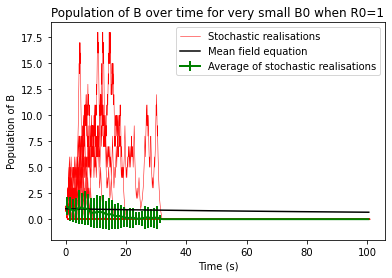

In [5]:
#B0=1 and R0=1 with the MFE line
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta =0.50001
gamma =0.5
N=100
B0 =1
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt


plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, color='green',zorder=101, label='Average of stochastic realisations' )


#Mean field equation
C=(N*(beta-gamma)-B0*beta)/(B0*N*(beta-gamma))
B_true = (N*(beta-gamma))/(beta+(C*N*(beta-gamma)*np.exp((gamma-beta)*t)))
plt.plot(t,B_true,color = 'black', zorder=101,label= 'Mean field equation')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for very small B0 when R0=1')
plt.legend()

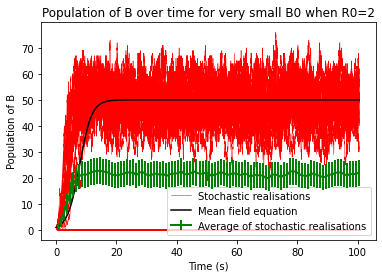

In [7]:
#B0=1 and R0=2 with the MFE line
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta =1.0
gamma =0.5
N=100
B0 =1
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt


plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")
#average of stochastic realisations with error bar
plt.errorbar(time, average, yerr=std, linewidth=2, color='green',zorder=101, label='Average of stochastic realisations' )

#Mean field equation
h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)  
C=(N*(beta-gamma)-B0*beta)/(B0*N*(beta-gamma))
B_true = (N*(beta-gamma))/(beta+(C*N*(beta-gamma)*np.exp((gamma-beta)*t)))
plt.plot(t,B_true,color = 'black', label= 'Mean field equation')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for very small B0 when R0=2')
plt.legend()

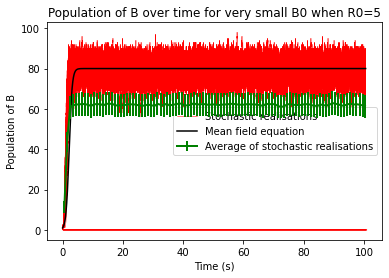

In [8]:
#B0=1 and R0=5 with the MFE line
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta =2.5
gamma =0.5
N=100
B0 =1
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt


plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, color='green',zorder=101, label='Average of stochastic realisations' )


#Mean field equation
C=(N*(beta-gamma)-B0*beta)/(B0*N*(beta-gamma))
B_true = (N*(beta-gamma))/(beta+(C*N*(beta-gamma)*np.exp((gamma-beta)*t)))
plt.plot(t,B_true,color = 'black', label= 'Mean field equation')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for very small B0 when R0=5')
plt.legend()

When B0=1 and R0 equals to 2, there is a significant difference between the mean field solution and the average of stochastic realisations. This is because the stochastic realisations either converges at 0 or converges at the stable fixed point(B=50). Therefore the average of stochastic realisations will be between 0 and the stable fixed point (around 20) with large standard deviation. We know that when R0>1 the stable fixed point is B* and the equation for B*=((R0-1)*N)/R0 gives stable fixed point at 50. The mean field equation converges at this point however the average of stochastic realisations converges to 20. The rate vector for individals to change states from A to B is given by the equation B0*beta/N. The rate for individuals to change states from B to A is proportional to the rate of gamma. When B0=1, the rate vector is smaller for individuals to change states from A to B (according to equation). Therefore there is a greater chance of the random permutation leading to a change in states from B to A at smaller time values. When the realisations of population of B hits 0, it will converge to this value and not change over time since its a fixed point. This is more likely to occur when B0=1.  

There is a more likely chance to find the one B individual(B0=1) at smaller time values to change states, when R0 is lower (lower beta and higher gamma) hence the rate vector will favor changing states from B to A which means the population of B will converge to 0. However a greater R0 value (increased beta) will mean the rate vector for individuals to change states from A to B (B0*beta/N) is more likely, even though B0=1. This is visualised when the average of stochastic realisations for B0=1 when R0=5 is much closer to the mean field solution than when B0=1 and R0=2. Even at this higher R0 value, there are some realisations that converge to 0 since B0=1, leading to the poor agreement of average of stochastic realisations and mean field solution. 

Other B0 values with the same R0 level leads to good agreement of the two solutions hence the poor agreement only occurs when B0=1 or very small B0 values. 

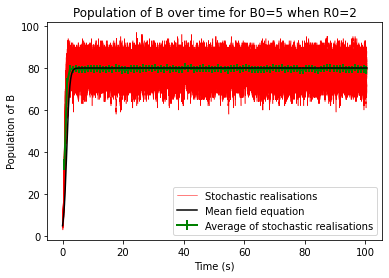

In [13]:
#B0=5 and R0=2 with the MFE line
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta =2.5
gamma =0.5
N=100
B0 =5
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt


plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, color='green',zorder=101, label='Average of stochastic realisations' )


#Mean field equation
C=(N*(beta-gamma)-B0*beta)/(B0*N*(beta-gamma))
B_true = (N*(beta-gamma))/(beta+(C*N*(beta-gamma)*np.exp((gamma-beta)*t)))
plt.plot(t,B_true,color = 'black', zorder=102, label= 'Mean field equation')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for B0=5 when R0=2')
plt.legend()

When B0=5 and R0=2 there is a good agreement between the mean field solution and average of stochastic realisations. None of the realisations randomly converge to B=0. Therefore only at very small B0 values there is a poor agreement due to the convergence of some realisations to 0. 

### Question 4

In this question we are given two examples to conduct simulations on. The number of N, beta and gamma values are given to us and we have to identify the agreement between average of stochastic realisations and mean field solution. The R0 values for the examples are 1.02 and 1.9 and we can vary our B0 parameter. Therefore we will conduct the examples at B0=1 and B0=500 and identify the agreements in each example to give 4 scenarios. We can work out the fixed point or B* for both examples using B*=((R0-1)*N)/R0. For example 1 we get the fixed point at B=19.61 and example 2 we get fixed point at B= 474. We expect both the solutions to converge at these points depending on the scenario.

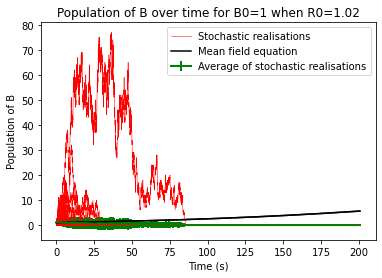

In [9]:
#B0=1 for example 1
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta =0.51
gamma =0.5
N=1000
B0 =1
tmax=200
dfs = []
n = 100 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt


plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, color='green',label='Average of stochastic realisations' )


#Mean field equation
C=(N*(beta-gamma)-B0*beta)/(B0*N*(beta-gamma))
B_true = (N*(beta-gamma))/(beta+(C*N*(beta-gamma)*np.exp((gamma-beta)*t)))

C=(N*(beta-gamma)-B0*beta)/(B0*N*(beta-gamma))
B_true = (N*(beta-gamma))/(beta+(C*N*(beta-gamma)*np.exp((gamma-beta)*t)))
plt.plot(t,B_true,color = 'black')
plt.plot(t,B_true,color = 'black', label= 'Mean field equation')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for B0=1 when R0=1.02')
plt.legend()


The average of stochastic realisations seems to converge at B=0 and the mean field solution is slowly converging towards the fixed B* point. 

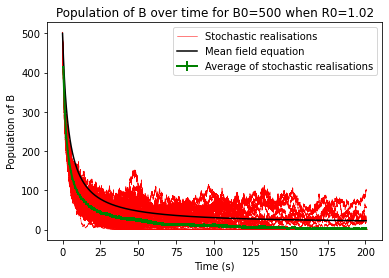

In [10]:
#B0=200 for example 1
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta =0.51
gamma =0.5
N=1000
B0 =500
tmax=200
dfs = []
n = 100 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt


plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, zorder=101, color='green',label='Average of stochastic realisations' )


#Mean field equation
C=(N*(beta-gamma)-B0*beta)/(B0*N*(beta-gamma))
B_true = (N*(beta-gamma))/(beta+(C*N*(beta-gamma)*np.exp((gamma-beta)*t)))
plt.plot(t,B_true,color = 'black', label= 'Mean field equation')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for B0=500 when R0=1.02')
plt.legend()

The mean field solution takes a much longer time for it converge to 0 compared to the average of stochastic realisations, as visualised in the above graph when B0=500 and R0=1.02. However the difference in agreement between the two is not very large. The mean field solution is slowly converging towards the B* fixed point however the average of stochastic realisations is converging towards B=0 which is the wrong fixed point. Now lets look at example 2.

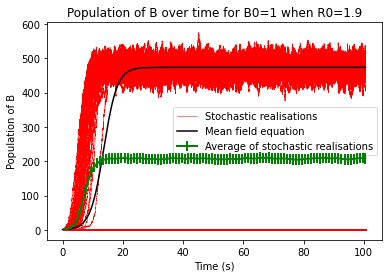

In [5]:
#B0=1 for example 2
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta = 0.95
gamma =0.5
N=1000
B0 =1
tmax=100
dfs = []
n = 100 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt


plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2,zorder=101, color='green',label='Average of stochastic realisations' )


#Mean field equation
C=(N*(beta-gamma)-B0*beta)/(B0*N*(beta-gamma))
B_true = (N*(beta-gamma))/(beta+(C*N*(beta-gamma)*np.exp((gamma-beta)*t)))
plt.plot(t,B_true,color = 'black', label= 'Mean field equation')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for B0=1 when R0=1.9')
plt.legend()

When B0=1 and R0=1.9 for scenarios 2, there is a substantial difference in agreement between the mean-field and the average of the stochastic realisations. We discussed the reason for this previously, where some of the stochastic realisations converge at B=0 while others converge to the other fixed point at B=474. The average of stochastic realisations thus converges at around B=200 which is very different from the mean field solution. This scenario has the poorest agreement and therefore we need to come up with a solution to improve the agreement. This does not mean changing the gillespie algorithm but rather changing the way in which the average of stochastic realisations are calculated. Both the examples give R0 values greater than 1 therefore there should be no convergence to B=0 at any time point. This is because when R0>1, the stable fixed point (B*) will always be greater than 0. The problem with this algorithm is that once the realisation hits B=0 at any given time point, it will converge at this point and not change. This means the average is negatively affected. To solve this we can exclude any trajectories that hit 0 (and therefore remain at zero) when calculating the average. In the scenario above where B0=1 and R0=1.9, if we eliminate all the realisations where it incorrectly converges to B=0, then the average of realisations will only include the realisations that converge correctly at B=474. This should lead to a better agreement of average of stochastic realisations and mean field solution. 

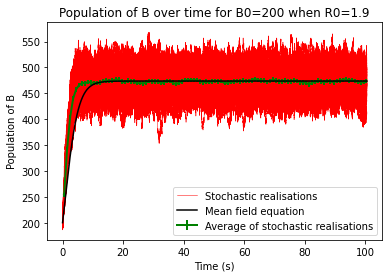

In [6]:
#B0=200 for example 2
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta = 0.95
gamma =0.5
N=1000
B0 =200
tmax=100
dfs = []
n = 100 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt


plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2,zorder=101, color='green',label='Average of stochastic realisations' )


#Mean field equation
C=(N*(beta-gamma)-B0*beta)/(B0*N*(beta-gamma))
B_true = (N*(beta-gamma))/(beta+(C*N*(beta-gamma)*np.exp((gamma-beta)*t)))
plt.plot(t,B_true,color = 'black',zorder=102, label= 'Mean field equation')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for B0=200 when R0=1.9')
plt.legend()

The agreement between the average and mean field is very good when we increase the B0 value to 200 and R0=1.9. Now lets implement the proposed solution for the poorest agreement scenario.

### Evidence of improved agreement

To implement the proposed solution of excluding any trajetories that equal to 0 in the average of stochastic realisations, we will use an if statement which ensures only the B values that does not equal to 0 over time, will be excluded from the resampling process which is needed to calculate the average of stochastic realisations. Let's see how it works.

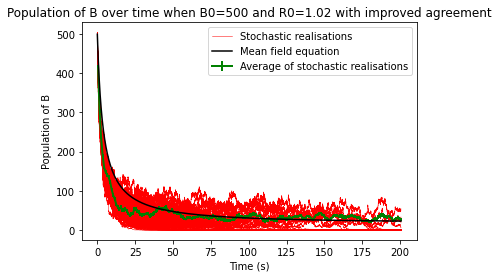

In [19]:
#B0=500 and R0=1.02 with improved agreement
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta =0.51
gamma =0.5
N=1000
B0 =500
tmax=200
dfs = []
n = 100 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt


plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, zorder=101, color='green',label='Average of stochastic realisations' )


#Mean field equation
C=(N*(beta-gamma)-B0*beta)/(B0*N*(beta-gamma))
B_true = (N*(beta-gamma))/(beta+(C*N*(beta-gamma)*np.exp((gamma-beta)*t)))
plt.plot(t,B_true,color = 'black',zorder=102, label= 'Mean field equation')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time when B0=500 and R0=1.02 with improved agreement')
plt.legend()


When B0=500 and R0=1.02, there should not be convergence at 0 because R0>1. This is visualised by the graph above which excludes the B=0 trajectories from the average thus there is a much better agreement.

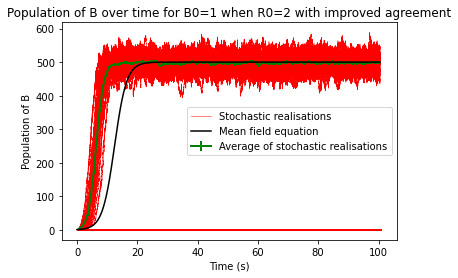

In [8]:
#B0=1 and R0=2 with improved agreement
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta =1.0
gamma =0.5
N=1000
B0 =1
tmax=100
dfs = []
n = 100 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt


plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")


h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)    
plt.errorbar(time, average, yerr=std, linewidth=2, zorder=101, color='green',label='Average of stochastic realisations' )


#Mean field equation
C=(N*(beta-gamma)-B0*beta)/(B0*N*(beta-gamma))
B_true = (N*(beta-gamma))/(beta+(C*N*(beta-gamma)*np.exp((gamma-beta)*t)))
plt.plot(t,B_true,color = 'black',zorder=102, label= 'Mean field equation')
plt.xlabel('Time (s)')
plt.ylabel('Population of B')
plt.title('Population of B over time for B0=1 when R0=2 with improved agreement')
plt.legend()

When B0=1 and R0=2 for the improved agreement solution, there is clearly a much better agreement of both solutions. Even though there are realisations that converge at B=0, these realisations are not included in the average of stochastic realisations hence a much better agreement.

# Critical Thinking Question 1

A current real world scenario that is very relevant to the behviour of the model is the spread of COVID-19 over time. Infectious diseases naturally have an exponential growth in transmission of the disease. We can model the population of B as the number of individuals with COVID-19 and population of A are rest of the population that do not have the disease. This assumption fits the system well because when B0=0 (no one in the population has COVID-19) at t=0, then there will be no growth of population B. The rate at which individuals become infected or change states from not infected to infected with the disease (A to B) is given at the rate (B0*beta/N) which is proportional to the number of their neighbours that are infected (in state B). This makes sense since the COVID-19 will spread more if the number of neighbours with the disease is high. The rate at which individuals go from infected to not infected or recovered from the disease is given by the fixed rate gamma. The R0 value can represent the rate of infection which informs us how infectious the disease is i.e. each person with the infection will infect how many other people on average. 

If R0 is less than 1, each existing infection causes less than one new infection. In this case, the disease will decline and eventually die out. If R0 equals 1, each existing infection causes one new infection. The disease will stay alive and stable, but there won’t be an outbreak or an epidemic. If R0 is more than 1, each existing infection causes more than one new infection. The disease will be transmitted between people, and there may be an outbreak or epidemic. The critical regime is R0=1 because when this rate is exceeded, an outbreak of the disease is more likely. 

The benefit of modelling such a system is that it can assist the government in implementing measures to restrict further outbreak of the disease. For example, a higher R0 value (rate of infection) of COVID-19 will mean that the government needs to impose strategies such as social distancing/lockdown to slow the exponential growth of the disease.

An example in which the equilibria is of interest is population size of an animal, specifically the predators. Here the predator population size reaches an equilibria when there are not enough preys in the population.

# Critical Thinking Question 2

As the questions states, one of the biggest assumptions of this model is that all individuals are potentially in contact with each other. A more likely scenario is that each individual is only in contact with it's direct neighbours rather than the whole population. For example, if we suppose the population of individuals in state B is the number of people infected with COVID-19 in the UK, an individual in Manchester can not infect an individual in London since they are too far away (assuming the indivudal doesn't travel to London). The current model assumes that the indviduals in the population can infect any other indivudals. This is unlikely to be the case in real world modelling scenarios using this system. Since we do not know the population size (N) and the number of direct neighbours each individual has in relation to the population, we will come up with an abitrary value in proportion to the population size. In this case I have chosen that an individual is in contact with 2% of the population size (N). So a population of 1000 would mean an individual is in direct contact with 20 people out of the 1000. This value can be changed depepnding on each scenario.

The changes made to the code in order to include this scenario is implemented where the individual that sees state change is in state A (state[event]==0). Here it randomly interacts with 2% of the population size using a for loop and appending the index. If the randomly chosen direct neighbours of the individual are in state B then state A individual becomes state B so number of state A individuals is decreased. This logic does not apply for the individuals that see state change when they are in state B because state B cahnges to state A at a constant rate. The code is implemented below.

In [21]:
# 28 November 2020 v1.2
# Luc Berthouze
from random import expovariate, seed # Generate variates from exponential distribution
import numpy as np
import random
def gillespie_ABA(N,B0,beta,gamma,Tmax):

    A=[N-B0] # We cannot predict how many elements there will be unfortunately
    B=[B0]
    T=[0] 
    state = np.random.permutation([0]*(N-B0)+[1]*B0) # Randomly allocate B0 individuals to have state B (state=1), A (state=0) otherwise 
    B_contacts = np.where(state==1)[0] # Index of individuals in state B (state=1).
    rate_vector = B0*beta*np.ones((N,1))/N # Set rates to be B0*beta/N (rate for individuals in state A) to all individuals (initialisation). 
    rate_vector[B_contacts] = gamma # Update rate of B_contacts to be gamma (the rate for individuals in state B)
    
    time = 0
    while time<=Tmax+0.5: # some (arbitrary) buffer after Tmax
        rate = np.sum(rate_vector) # Total rate (refer to Gillespie algorithm for details)
        cumrate = np.cumsum(rate_vector) # Cumulated sum of rates
        if rate > 0.000001: # if rate is sufficiently large, one in A or B will change state

            tstep = expovariate(rate) # Pick an exponentially distributed time. Beware of difference with exprnd in Matlab where it is 1/rate
            T.append(T[-1]+tstep) # Time of next event
            event = np.where(cumrate>np.random.rand()*rate)[0][0] # Find which individual will see its state change 
            if state[event]==0: # individual is in state A 
                #if (event<len(state)-1):
                    #if (state[event-1]==1 or state[event+1]==1): # only change states if neighboruing states are in State B
                    index =[]
                    for i in range (int(0.02*N)): # interacts with 2% of population size randomly
                        index.append(int(np.random.rand()*len(state)))
                    if 1 in state[index]: # Change if any of the other states are in state B
                        A.append(A[-1]-1) # this state A individual becomes state B so number of state A individuals is decreased
                        B.append(B[-1]+1) # obviously, number of state B individuals is increased 
                        state[event] = 1 # Update state vector
                        rate_vector[event] = gamma # Change rate of individual to B->A rate, namely gamma
                        A_contacts = np.where(state==0)[0] # List of state A individuals after change
                        rate_vector[A_contacts] += beta/N # Update rate of state A individuals to account for the extra state B individual
                    else:
                        A.append(A[-1]) 
                        B.append(B[-1])
        
            else: # individual is in state B
                # No need to apply above logic to state B since state B changes to State A at a constant rate independent of number of individuals in State A
                
                 
                B.append(B[-1]-1) # this state B individual becomes state A so number of state B individuals is decreased
                A.append(A[-1]+1) # obviously, number of state A individuals is increased
                state[event] = 0 # Update state vector
                A_contacts = np.where(state==0)[0] # List of state A individuals after changes                                
                rate_vector[A_contacts] = beta*len(np.where(state==1)[0])/N # Update rate of state A individuals based on number of B individuals
                    
                
        else: # Nothing will happen from now on so we can accelerate the process
            time = T[-1] # current time
            while time <= Tmax + 0.5:
                A.append(A[-1]) # Just keep things as they are
                B.append(B[-1])
                T.append(T[-1]+0.5) # arbitrarily add 0.5 to clock
                time = T[-1]
        # Update time and proceed with loop 
        time = T[-1]         

    return T,A,B    


To investigate this change in algorithm of gillespie code that doesn't assume all individuals are in contact with each other, we need to demosntrate it experimentally. From the previous observations, the key parameter is the R0 value. 

We can speculate what could affect the results observed previously. The rate at which state A changes to state B in this new code is now B0* beta/N* 0.02. The rate at which state B changes to state A is still the fixed rate gamma. Therefore the changing of states from A to B will be much slower when compared to the mean field solution, for all parameters. Let's visualise this experimentally.

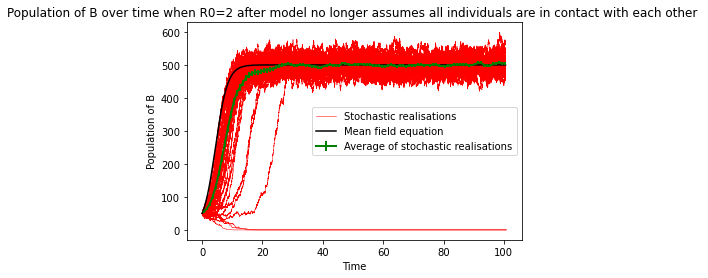

In [25]:
#R0 equals 2 for new code
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta =1.0
gamma =0.5
N=1000
B0 =50
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt


plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")
#average of stochastic realisations with error bar
plt.errorbar(time, average, yerr=std, linewidth=2, color='green',zorder=101, label='Average of stochastic realisations' )

#Mean field equation
h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)  
C=(N*(beta-gamma)-B0*beta)/(B0*N*(beta-gamma))
B_true = (N*(beta-gamma))/(beta+(C*N*(beta-gamma)*np.exp((gamma-beta)*t)))
plt.plot(t,B_true,color = 'black', label= 'Mean field equation')
plt.xlabel('Time')
plt.ylabel('Population of B')
plt.title('Population of B over time when R0=2 after model no longer assumes all individuals are in contact with each other ')
plt.legend()

When R0=2 with the improved code of gillespie algorithm, the population of B reaches fixed point at a slower rate and longer time compared to the mean field solution. This is because less individuals are in contact with each other therefore individuals change from state A to state B at a much slower rate. Using the COVID-19 analogy again, when the infectious rate is high, which it is in this case since R0=2, the individuals with COVID-19 (population of B) are less likely to infect others since not all individuals are in contact with each other. Therefore population of B will increase less steeply over time.

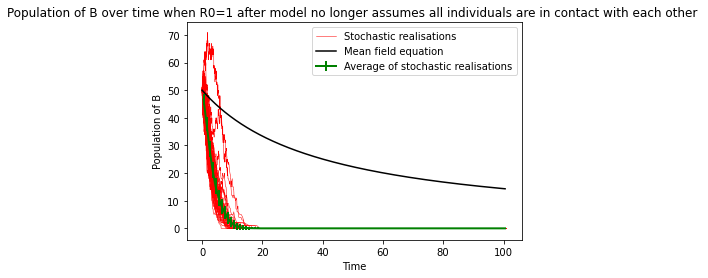

In [27]:
#R0 equals around 1 for new code
import pandas as pd
import datetime

date_offset = '2020-12-30 20:07:38' # can be any random date 

beta =0.5001
gamma =0.5
N=1000
B0 =50
tmax=100
dfs = []
n = 50 # different realisations
for i in range (0,n):
    df = pd.DataFrame()
    df['T'], df['A'], df['B'] = gillespie_ABA(N,B0,beta,gamma, tmax)
    # timestamp for 
    df['timestamp'] = pd.to_datetime(df['T'], unit='s', origin=date_offset)
    dfs.append(df)
average = []
time=[]
std = []
#running over length of resampling, dependent on tmax value 
for j in range (0, len(dfs[4].reset_index().set_index('timestamp').resample('1s').mean())):
    B=[]
    t=[]
    #running over number of realisations
    for i in range(0,n):
        #if (dfs[i]['B']!=0).all(): # exclude any trajectories which hit zero
            B.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['B'].interpolate()[j])
            t.append(dfs[i].reset_index().set_index('timestamp').resample('1s').mean()['T'].interpolate()[j])
    average.append(np.average(B))
    std.append(np.sqrt(np.std(B)))
    time.append(np.average(t))
import matplotlib.pyplot as plt


plt.figure()
for i in range (0,n):
    plt.plot(dfs[i]['T'], dfs[i]['B'], 'r-', linewidth=0.5, label= 'Stochastic realisations' if i == 0 else "")
#average of stochastic realisations with error bar
plt.errorbar(time, average, yerr=std, linewidth=2, color='green',zorder=101, label='Average of stochastic realisations' )

#Mean field equation
h = 0.54  
interval = 0.01
t = np.arange(0,tmax+h, interval)  
C=(N*(beta-gamma)-B0*beta)/(B0*N*(beta-gamma))
B_true = (N*(beta-gamma))/(beta+(C*N*(beta-gamma)*np.exp((gamma-beta)*t)))
plt.plot(t,B_true,color = 'black', label= 'Mean field equation')
plt.xlabel('Time')
plt.ylabel('Population of B')
plt.title('Population of B over time when R0=1 after model no longer assumes all individuals are in contact with each other ')
plt.legend()

This is an interesting result at R0=1 after the model assumes all individuals are not in contact with each other. The population of B decreases very steeply and quickly to 0, compared to the mean field solution. Generally when R0=1, state A turns into state B at a much lower rate than when state B turns into A. In this case (R0=1), state B changes to state A at an even quicker rate. This is because the fixed rate of gamma (state B to state A) overpowers the much slower rate of state A to state B. Therefore there is a steep drop in population of B.